## Student Information
Name: 張哲緯

---


## **Instruction**
  
Welcome to NEAF DIP workshop!  
Here we prepare some widely used methods to let you practice, including:
1. Histogram Equalization
2. Mean blur, Median blur, Gaussian blur
3. Binary
4. HSV filter
5. Morphological: erosion, dilation, open, close
6. Find contours

Those skills are very powerful and important skills, please enjoy learning and put them into good use :)

---

## **1. Histogram Equalization**
Histogram is the method to enhance image contrast.  
Please show the image grayscale histogram and do the equlization, and show the image result and histogram equalization result.  

<img src="md_picture/1.png" width="60%" heught="60%">

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

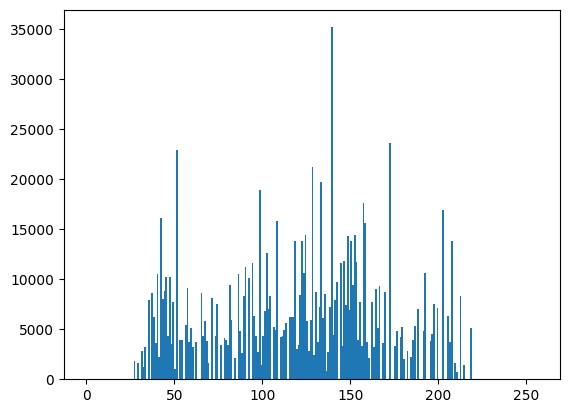

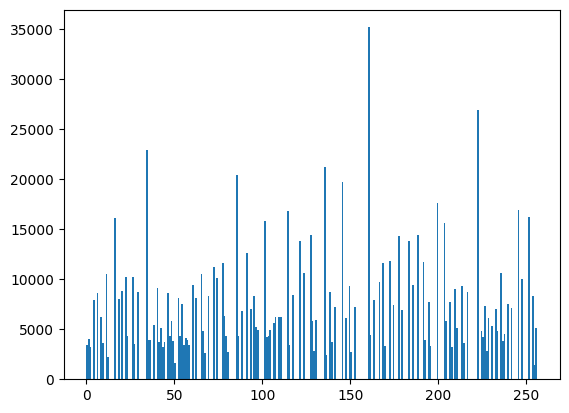

In [2]:
img_ori = cv2.imread('input/lena.bmp', cv2.IMREAD_GRAYSCALE) # Read image as gray.
img_ori_hist = cv2.calcHist([img_ori],[0],None,[256],[0,256])
plt.hist(img_ori.ravel(),256,[0,256])
plt.show()



img_equa = cv2.equalizeHist(img_ori)
img_equa_hist = cv2.calcHist([img_equa],[0],None,[256],[0,256])
plt.hist(img_equa.ravel(),256,[0,256])
# save result
cv2.imwrite('output/img_ori.bmp', img_ori)
cv2.imwrite('output/img_equa.bmp', img_equa)
plt.show()


_keywords: plt.hist, cv2.equalizeHist, cv2.calcHist_

---

## **2. Mean blur, Gaussian blur, Median blur**
Blur is a method to deal with the noise on the image.
Please input the image and use different kernel size to show blur result.

<img src="md_picture/2.png" width="60%" heught="60%">
<img src="md_picture/3.png" width="60%" heught="60%">

In [3]:
img_noise = cv2.imread('input/lena_noise.png', cv2.IMREAD_GRAYSCALE)

# Blur the image by three methods.
img_mean_blur=cv2.blur(img_noise, (5, 5))
img_gaussian_blur=cv2.GaussianBlur(img_noise, (5, 5), 0)
img_median_blur=cv2.medianBlur(img_noise,5)
# save result
cv2.imwrite('output/img_mean_blur.png', img_mean_blur)
cv2.imwrite('output/img_gaussian_blur.png', img_gaussian_blur)
cv2.imwrite('output/img_median_blur.png', img_median_blur)

True

### Question:
1. What is the difference between three methods? When to use them?
2. What is the difference if the kernel size changes?  


_keywords: cv2.blur, cv2.GaussianBlur, cv2.medianBlur_

---

## **3. Binary**
Binary is a method to transfer greyscale to 0 (black) and 255 (white) only.  
Please do the image binary to seperate pad and background.  

<img src="md_picture/4.png" width="60%" heught="60%">

In [6]:
binary1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background

"""
Your code here
"""
_,thres1 = cv2.threshold(binary1, 128, 255, cv2.THRESH_BINARY)
# save result
cv2.imwrite('output/binary_task1.bmp', thres1)

True

In [3]:
binary2 = cv2.imread('input/binary_task2.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background

"""
Your code here
"""
_,thres2 = cv2.threshold(binary2, 128, 255, cv2.THRESH_BINARY)
# save result
cv2.imwrite('output/binary_task2.bmp', thres2)

True

In [4]:
binary3 = cv2.imread('input/binary_task3.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background

"""
Your code here
"""
_,thres3 = cv2.threshold(binary3, 128, 255, cv2.THRESH_BINARY)
# save result
cv2.imwrite('output/binary_task3.bmp', thres3)

True

### Questions:
1. What are the limits of this methods?
2. What if the light source is not uniform? Is this method still work? How to improve it?  

_keywords: cv2.threshold_

---

## **4. HSV filter**
This method could extract the the interested part by color.  
Please crop the yellow or blue boxes and its surrounding in the image.

<img src="md_picture/5.png" width="30%" heught="30%">

### Steps:
1. Transfer color to HSV.
2. Setting the color range and filter the image. (output the color image in the setting range)
3. Binary the image, find the left-top and right-bottom coordinate.
4. Crop the image by the coordinate.  

- Noted: Blur, histogram equalization methods could be used if needed.  

In [27]:
# Yellow box.
yellow = cv2.imread('input/yellow.jpg')

# Step 1. Transfer color to HSV
hsv = cv2.cvtColor(yellow, cv2.COLOR_BGR2HSV)
# Step 2. Setting the color range and filter the image.
bound_lower = np.array([20, 50, 50])
bound_upper = np.array([40, 255, 255])
mask = cv2.inRange(hsv, bound_lower, bound_upper)
# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
# Step 4. Crop the image by the coordinate.
crop_edge = 20  # surrounding 20 pixels 
cropHSV_yellow = yellow[y-crop_edge: y+h+crop_edge, x-crop_edge: x+w+crop_edge]   # take (x, y, w, h) as example.

# save result
cv2.imwrite('output/cropHSV_yellow.jpg', cropHSV_yellow)

True

In [28]:
# Blue box.
blue = cv2.imread('input/blue.jpg')

# Step 1. Transfer color to HSV
hsv = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
# Step 2. Setting the color range and filter the image.
bound_lower = np.array([100, 50, 50])
bound_upper = np.array([150, 255, 255])
mask = cv2.inRange(hsv, bound_lower, bound_upper)
# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
# Step 4. Crop the image by the coordinate.
crop_edge = 20  # surrounding 20 pixels 
cropHSV_blue = blue[y-crop_edge: y+h+crop_edge, x-crop_edge: x+w+crop_edge]   # take (x, y, w, h) as example.

# save result
cv2.imwrite('output/cropHSV_blue.jpg', cropHSV_blue)

True

---

## **5. Morphological: erosion, dilation, open, close**

Those methods help to denoise, enhance the features.   
Please use these methods to fill up the lines of the image created in the previous section.

<img src="md_picture/6.png" width="60%" heught="60%">

In [36]:
hsv_yellow = cv2.imread('output/cropHSV_yellow.jpg')

# Try to use erosion, dilation, open, close to fill up the lines.

"""
Your code here
"""
#Median blur
hsv_yellow_median_blur=cv2.medianBlur(hsv_yellow,5)

#grayscale
hsv_yellow_gray = cv2.cvtColor(hsv_yellow_median_blur, cv2.COLOR_BGR2GRAY)

#dilate
kernel = np.ones((3, 3), np.uint8)
result = cv2.morphologyEx(hsv_yellow_gray,cv2.MORPH_OPEN, kernel)


# save result
cv2.imwrite('output/morpho_yellow.jpg', result)


True

In [37]:
hsv_blue = cv2.imread('output/cropHSV_blue.jpg')

# Try to use erosion, dilation, open, close to fill up the lines.

"""
Your code here
"""
#Median blur
hsv_blue_median_blur=cv2.medianBlur(hsv_blue,5)

#grayscale
hsv_blue_gray = cv2.cvtColor(hsv_blue_median_blur, cv2.COLOR_BGR2GRAY)

#dilate
kernel = np.ones((3, 3), np.uint8)
result = cv2.morphologyEx(hsv_blue_gray,cv2.MORPH_OPEN, kernel)
# save result
cv2.imwrite('output/morpho_blue.jpg', result)

True

_keywords: cv2.erode, cv2.dilate, cv2.morpholopyEx_

---

## **6. Find countours**

Use package to find the contours in the image.

Practice:
1. Find the pad and probemark contours in the pad series images.
2. Calculate the countours area.

<img src="md_picture/7.png" width="60%" heught="60%">

In [38]:
pad_task1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)

# Find the pad and probemark contours and draw.

"""
Your code here
"""
contour_image = cv2.cvtColor(pad_task1, cv2.COLOR_GRAY2BGR)

pad_area = 0
probemark_area = 0
for contour in contours:
    area = cv2.contourArea(contour)

    if area > 100: 
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

        if len(approx) == 4:
            cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2) 
            pad_area += area
        elif len(approx) > 4:
            cv2.drawContours(contour_image, [contour], -1, (0, 0, 255), 2) 
            probemark_area += area
# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', result)
print('The pad area is ', pad_area)
print('The probe mark area is ', probemark_area)

The pad area is  0
The probe mark area is  0


_keywords: cv2.findContours, cv2.contourArea_

---

### **Extra Challenge**

Try to find the contours of circular workspace in the image.  
You can use other DIP methods from other packages.

<img src="md_picture/8.png" width="50%" height="50%">

- Hint : The light source isn't uniform, try to eliminate the the influence of the light source.

In [ ]:
img = cv2.imread('input/extra_1.bmp')

# Find the contour of circular workspace in the image.

"""
Your code here
"""

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', result)

In [ ]:
img = cv2.imread('input/extra_2.bmp')

# Find the contour of circular workspace in the image.

"""
Your code here
"""

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', result)

In [ ]:
img = cv2.imread('input/extra_3.bmp')

# Find the contour of circular workspace in the image.

"""
Your code here
"""

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', result)